# EE 559 Project 1

#### Comparing couple of images from MNIST dataset using DCNN.

In [1]:
import torch
import matplotlib.pyplot as plt

import dlc_practical_prologue as prologue
from models import *
from training import *
from other import *

# Load the Dataset

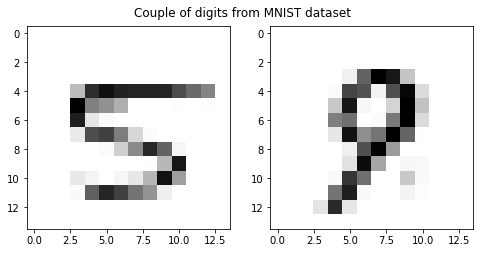

In [2]:
N = 1000
train_input, train_target, train_classes, test_input, test_target, test_classes = prologue.generate_pair_sets(N)

# Example
n = torch.randint(1000,[1])[0]
fig, axs = plt.subplots(1,2, figsize=(8,10))
fig.subplots_adjust(top=1.5)
fig.suptitle('Couple of digits from MNIST dataset')
axs[0].imshow(train_input[n,0], cmap='Greys')
axs[1].imshow(train_input[n,1], cmap='Greys');

# MODEL 1
#### Model directly each couple of images of digits to the binary output through a Multi-Layers Perceptron (IneqMLP)

C:\Users\Riccardo\Anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Device used:  cpu
Loading training and test set...
Splitting the training set in training and validation set...
Data augmentation...
Preparing the data time: 0.309 seconds
In total there are: 
 - 1800 samples in the Training Set (900 *2), 
 - 100 samples in the Validation Set, 
 - 1000 samples in the Test Set
Number of parameters of the model: 279562
Training...
Training time: 20.345 seconds
Saved the model weights in:  ./model_weights/IneqMLP.pth

Training error: 1.111 %
Validation error: 20.000 %
Test error: 16.000 %


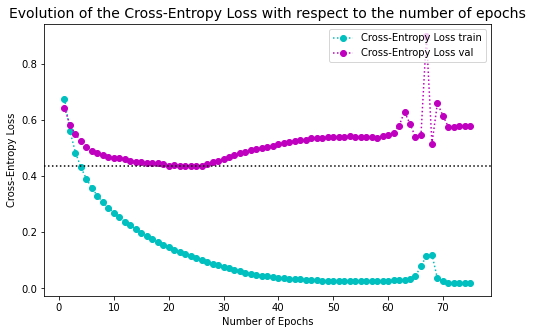

In [3]:
# model
model = IneqMLP()
model_name='IneqMLP'

# training
percentage_val = 0.1
nb_epochs = 75
mini_batch_size = 50

# optimizer
weight_decay = 0.1
lr = 8e-5*0.5
period = 1

# display
verbose = 1
plot = True

run_experiment(model, model_name=model_name, percentage_val=percentage_val,nb_epochs=nb_epochs, mini_batch_size=mini_batch_size, weight_decay=weight_decay, lr=lr, period=period, verbose=verbose, plot=True);

In [4]:
#evaluate_model(model, 10, nb_epochs=nb_epochs, weight_decay=weight_decay, mini_batch_size=mini_batch_size, lr=lr, percentage_val=percentage_val)

# MODEL 2
#### Model directly each couple of images of digits to the binary output through a Convolutional Neural Network (IneqCNet)

Device used:  cpu
Loading training and test set...
Splitting the training set in training and validation set...
Data augmentation...
Preparing the data time: 0.360 seconds
In total there are: 
 - 1800 samples in the Training Set (900 *2), 
 - 100 samples in the Validation Set, 
 - 1000 samples in the Test Set
Number of parameters of the model: 77530
Training...
Training time: 25.876 seconds
Saved the model weights in:  ./model_weights/IneqCNet.pth

Training error: 1.556 %
Validation error: 14.000 %
Test error: 16.200 %


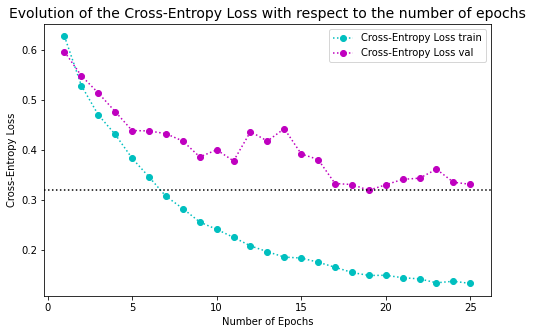

In [5]:
# model
model = IneqCNet()
model_name='IneqCNet'

# training
percentage_val = 0.1
nb_epochs = 25
mini_batch_size = 50

# optimizer
weight_decay = 0.1
lr = 1e-3*0.5
period = 1

# display
verbose = 1
plot = True

run_experiment(model, model_name=model_name, percentage_val=percentage_val, nb_epochs=nb_epochs, mini_batch_size=mini_batch_size, weight_decay=weight_decay, lr=lr, period=period, verbose=verbose, plot=True);

In [6]:
#evaluate_model(model, 10, nb_epochs=nb_epochs, weight_decay=weight_decay, mini_batch_size=mini_batch_size, lr=lr, percentage_val=percentage_val)

# MODEL 3
#### Firstly model each couple of images of digits to the digits that they represent and then evaluate their inequality. (DigiNET)

# MODEL 4
### Let's combine the first two approaches